In [2]:
# SALES PREDICTION USING PYTHON
# Import all standard lab

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Step 2: Load the dataset
data = pd.read_csv('/content/car_purchasing.csv',encoding='ISO-8859-1')
data.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [4]:
data.shape

(500, 9)

In [5]:
#  Data Pre-Processing
# drop unnecessary column from dataset
data= data.drop(['customer name','customer e-mail','country'],axis=1)
data.head()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [6]:
# here target variable is car purchase amount
# so need to apply regression algorithm on dataset for sales predictions.

data.isnull().sum()

gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

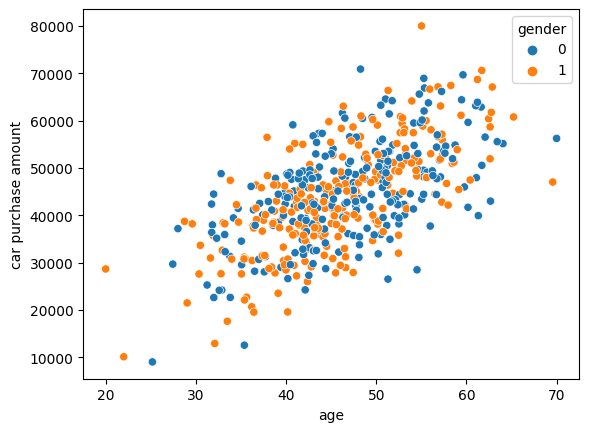

In [7]:
sns.scatterplot(x=data['age'],y=data['car purchase amount'], hue=data['gender'])
plt.show()

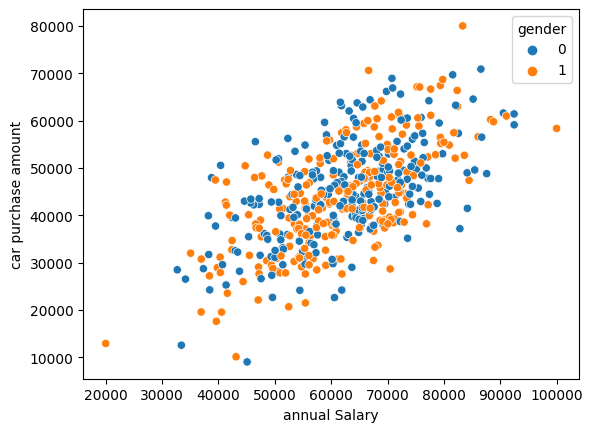

In [8]:
sns.scatterplot(x=data['annual Salary'], y= data['car purchase amount'], hue=data['gender'])
plt.show()

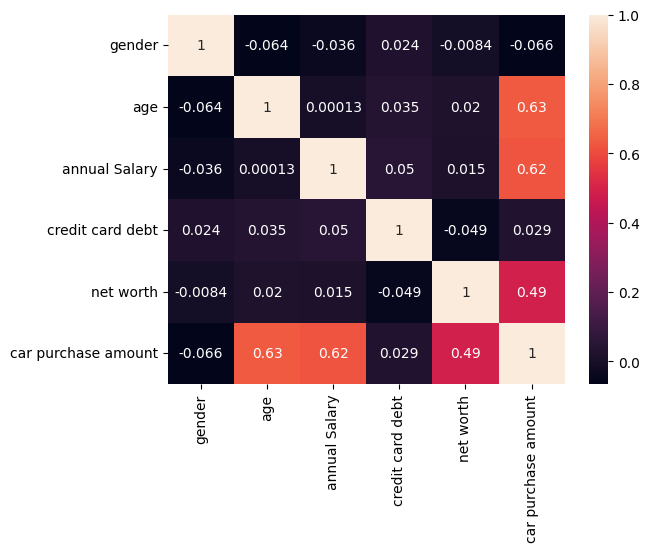

In [10]:
# check relation between dependent/target variable and independent variable
sns.heatmap(data.corr(),annot=True)
plt.show()

In [11]:
# Observation:
# From above plot we can see that the realtion between dependent variable(car purchase amount) and independent variable(gender) is very less i.e. -0.066
# so we can remove this independent variable from dataset.
data = data.drop('gender', axis=1)
data.head()

,age,annual Salary,credit card debt,net worth,car purchase amount
0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [12]:
# Apply feature scaling on dataset
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss

StandardScaler()

In [13]:
data[['age','annual Salary','credit card debt','net worth','car purchase amount']] = ss.fit_transform(data[['age','annual Salary','credit card debt','net worth','car purchase amount']])
data.head()

,age,annual Salary,credit card debt,net worth,car purchase amount
0,-0.550749,0.058576,0.574271,-1.110469,-0.825870
1,-0.673834,0.386570,-0.009951,0.573929,0.084157
2,-0.387508,-0.712361,0.445452,1.193976,-0.119313
3,1.509206,1.474794,1.382369,0.675595,2.156820
4,1.389066,-0.205111,-1.218962,0.743113,1.087644


In [14]:
# Apply ML algorithm on dataset
# separate x and y

x= data.drop('car purchase amount',axis=1)
y= data['car purchase amount']


In [15]:
# split data into train test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [16]:
# Apply KNN regression algorithm
from sklearn.neighbors import KNeighborsRegressor
knr =  KNeighborsRegressor()
knr

KNeighborsRegressor()

In [17]:
knr.fit(x_train,y_train)

KNeighborsRegressor()

In [18]:
#  Prediction
y_pred = knr.predict(x_test)
y_pred

array([-0.61322838, -0.05494643, -1.1394317 ,  0.55874357, -0.36083086,
        0.73177261,  1.21494089,  1.52885494, -0.46166772, -1.16072667,
        0.09806188,  1.15746304,  0.4884593 ,  1.53213936, -1.53851776,
       -1.11949411,  0.20702993,  1.1241548 , -0.32917937, -2.34573067,
        0.45641237, -0.54568049,  0.19441946, -1.34795596,  1.94725766,
        0.19669357,  0.01973968,  0.58868586,  1.438747  ,  1.04770685,
        0.50104879,  0.01509209,  0.88132734, -0.13159618,  1.80942049,
        1.02241648, -0.67951996,  1.55426795, -0.06264411, -0.06995535,
        1.29655553, -0.92211692, -1.48344079, -0.57013995, -0.13204699,
        0.04755194, -0.07182573,  0.63990538, -0.51499538, -0.71227315,
       -0.82682477, -0.38686759,  0.32156358,  0.7630043 , -0.34662578,
       -1.35006443,  0.0645856 ,  0.90534105, -0.01503299,  1.28778018,
       -0.46442115,  0.1105413 , -0.28472619,  0.06928565, -0.28885491,
        0.24993329,  1.48838452, -1.28839242, -0.29725933,  0.38

In [19]:
# Evaluation
from sklearn.metrics import r2_score
accuracy = r2_score(y_test,y_pred)
accuracy

0.9464389077456087

In [20]:
# Dataset has 94.64% accuracy by using KNN algorithm
# Try to apply LR algorithm on dataset
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(knr,x,y,cv=5)
accuracy

array([0.92624723, 0.94525334, 0.93709951, 0.9272104 , 0.92836711])

In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression()

In [22]:
lr.fit(x_train,y_train)

LinearRegression()

In [23]:
y_pred_lr = lr.predict(x_test)
y_pred

array([-0.61322838, -0.05494643, -1.1394317 ,  0.55874357, -0.36083086,
        0.73177261,  1.21494089,  1.52885494, -0.46166772, -1.16072667,
        0.09806188,  1.15746304,  0.4884593 ,  1.53213936, -1.53851776,
       -1.11949411,  0.20702993,  1.1241548 , -0.32917937, -2.34573067,
        0.45641237, -0.54568049,  0.19441946, -1.34795596,  1.94725766,
        0.19669357,  0.01973968,  0.58868586,  1.438747  ,  1.04770685,
        0.50104879,  0.01509209,  0.88132734, -0.13159618,  1.80942049,
        1.02241648, -0.67951996,  1.55426795, -0.06264411, -0.06995535,
        1.29655553, -0.92211692, -1.48344079, -0.57013995, -0.13204699,
        0.04755194, -0.07182573,  0.63990538, -0.51499538, -0.71227315,
       -0.82682477, -0.38686759,  0.32156358,  0.7630043 , -0.34662578,
       -1.35006443,  0.0645856 ,  0.90534105, -0.01503299,  1.28778018,
       -0.46442115,  0.1105413 , -0.28472619,  0.06928565, -0.28885491,
        0.24993329,  1.48838452, -1.28839242, -0.29725933,  0.38

In [24]:
from sklearn.metrics import r2_score
accuracy_lr = r2_score(y_test,y_pred_lr)
accuracy_lr

0.9999999793157544

In [25]:
# dataset has 99.99% accuracy by using Linear Regression algorithm
# Linear Regression is best fit on dataset